In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [25]:
model = tf.keras.models.load_model('Image_classify.keras')

In [3]:
img_width, img_height = 180, 180

In [4]:
data_cat = ['Ayam Goreng',
 'Burger',
 'French Fries',
 'Gado-Gado',
 'Ikan Goreng',
 'Mie Goreng',
 'Nasi Goreng',
 'Nasi Padang',
 'Pizza',
 'Rawon',
 'Rendang',
 'Sate',
 'Soto']

In [6]:
nutrition_data = pd.read_excel('Nutrition.xlsx')

In [15]:
image_path = 'testimg/nasigoreng1.jpeg' 
image = load_img(image_path, target_size=(img_height, img_width)) 
img_arr = img_to_array(image) 
img_bat = tf.expand_dims(img_arr, 0) / 255.0 

predict = model.predict(img_bat)
score = tf.nn.softmax(predict[0])

print(f"Food in image is {data_cat[np.argmax(score)]} with accuracy of {np.max(score) * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Food in image is Nasi Goreng with accuracy of 18.21%


In [17]:
predicted_class = data_cat[np.argmax(score)]
confidence = np.max(score) * 100

In [18]:
nutrition_info = nutrition_data[nutrition_data['Name'] == predicted_class].iloc[0]

In [19]:
print(f"Food in image is {predicted_class} with accuracy of {confidence:.2f}%")
print("\nNutrition Information per 100g:")
print(nutrition_info.to_dict())

Food in image is Nasi Goreng with accuracy of 18.21%

Nutrition Information per 100g:
{'Name': 'Nasi Goreng', 'serving_size_g': 100, 'calories': 167, 'fat_total_g': 4.1, 'fat_saturated_g': 1.0, 'protein_g': 3.3, 'sodium_mg': 450, 'potassium_mg': 130, 'cholesterol_mg': 25, 'carbohydrates_total_g': 28, 'fiber_g': 1.5, 'sugar_g': 1.2}


In [21]:
nutrition_details = f"""
Nutrition Information (per 100g):
- Calories: {nutrition_info['calories']} kcal
- Total Fat: {nutrition_info['fat_total_g']} g
- Saturated Fat: {nutrition_info['fat_saturated_g']} g
- Protein: {nutrition_info['protein_g']} g
- Sodium: {nutrition_info['sodium_mg']} mg
- Potassium: {nutrition_info['potassium_mg']} mg
- Cholesterol: {nutrition_info['cholesterol_mg']} mg
- Carbohydrates: {nutrition_info['carbohydrates_total_g']} g
- Fiber: {nutrition_info['fiber_g']} g
- Sugar: {nutrition_info['sugar_g']} g
"""

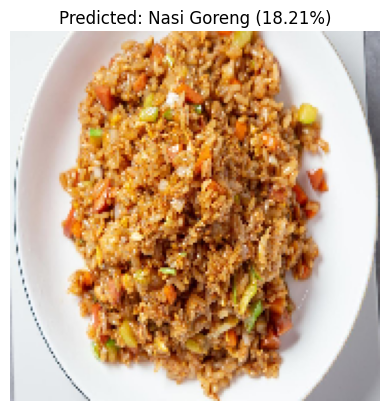


Nutrition Information (per 100g):
- Calories: 167 kcal
- Total Fat: 4.1 g
- Saturated Fat: 1.0 g
- Protein: 3.3 g
- Sodium: 450 mg
- Potassium: 130 mg
- Cholesterol: 25 mg
- Carbohydrates: 28 g
- Fiber: 1.5 g
- Sugar: 1.2 g



In [23]:
plt.imshow(image)
plt.title(f"Predicted: {data_cat[np.argmax(score)]} ({np.max(score) * 100:.2f}%)")
plt.axis("off")
plt.show()
print(nutrition_details)